<a href="https://colab.research.google.com/github/DamnScallion/Visionary-Unicorns-Project/blob/main/yolo/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone files from our GitHub Repo GOOOOO

In [1]:
!git clone https://github.com/DamnScallion/Visionary-Unicorns-Project.git

Cloning into 'Visionary-Unicorns-Project'...
remote: Enumerating objects: 10995, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 10995 (delta 25), reused 6 (delta 2), pack-reused 10941
Receiving objects: 100% (10995/10995), 87.93 MiB | 11.55 MiB/s, done.
Resolving deltas: 100% (71/71), done.
Updating files: 100% (10836/10836), done.


In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.0/605.0 kB 9.3 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
from ultralytics import YOLO
import os

In [4]:
ROOT_DIR = '/content/Visionary-Unicorns-Project/yolo/config'

In [6]:
# Create a new YOLO model from scratch
# Below is YOLOv8 Nano size model architecture
model = YOLO('yolov8n.yaml')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [7]:
# Train the model with original given dataset for 10 epochs
results = model.train(data=os.path.join(ROOT_DIR, 'yolo_config.yaml'), epochs=10, imgsz=224, name='yolov8n_e10')

Ultralytics YOLOv8.0.143 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/Visionary-Unicorns-Project/yolo/config/yolo_config.yaml, epochs=10, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_e10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=

In [8]:
val_results = model.val()

Ultralytics YOLOv8.0.143 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients
val: Scanning /content/Visionary-Unicorns-Project/yolo/data-yolo-format/original/labels/valid.cache... 72 images, 0 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.05it/s]
                   all         72         72      0.314      0.389       0.34      0.123
               penguin         72         36      0.305      0.444      0.389      0.157
                turtle         72         36      0.323      0.333      0.291     0.0886
Speed: 0.9ms preprocess, 4.0ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/yolov8n_e102


In [9]:
# load the model just trained
trained_model = YOLO('./runs/detect/yolov8n_e10/weights/best.pt')

In [ ]:
# Validate the model
metrics = trained_model.val()  # no arguments needed, dataset and settings remembered

Ultralytics YOLOv8.0.142 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients
val: Scanning /content/Visionary-Unicorns-Project/yolo/data-yolo-format/original/labels/valid.cache... 72 images, 0 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.97it/s]
                   all         72         72      0.857      0.861      0.888      0.665
               penguin         72         36      0.937      0.832      0.922      0.711
                turtle         72         36      0.776      0.889      0.854      0.619
Speed: 1.7ms preprocess, 1.6ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val


# Save the model to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!scp -r /content/runs/detect/yolov8n_custom_e100 '/content/drive/My Drive/Visionary-Unicorns-Project/yolo/runs/detect'

In [10]:
import cv2
from google.colab.patches import cv2_imshow
import math

In [ ]:
# trained_model = YOLO(os.path.join(ROOT_DIR, 'runs/detect/train/weights/best.pt'))

In [11]:
# Function to perform object detection
def detection(img_path, model):
  # Load image
  img = cv2.imread(img_path)

  # Perform object detection
  results = model.predict(source = img)

  # print(f'results = {results}')

  # Extract bounding boxes
  boxes = results[0].boxes
  print(f'boxes length = {len(boxes)}')

  bounding_boxes = []

  for box in boxes:
    left, top, right, bottom = box.xyxy[0]
    # left, top, right, bottom = int(left), int(top), int(right), int(bottom)
    left, top, right, bottom = int(math.ceil(left)), int(math.ceil(top)), int(math.ceil(right)), int(math.ceil(bottom))
    print(left, top, right, bottom)
    print(f'box = {box}')

    cls_id = int(list(box.cls)[0])

    print(f'cls_id = {cls_id}')

    bounding_boxes.append((left, top, right, bottom))

  return bounding_boxes

In [12]:
# VAL_DIR = '/content/drive/My Drive/Visionary-Unicorns-Project'
VAL_DIR = '/content/Visionary-Unicorns-Project'


0: 224x224 7 penguins, 7.8ms
Speed: 1.2ms preprocess, 7.8ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 224)
WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.
WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.
WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.
WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.
WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.
WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.
WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


boxes length = 7
155 98 526 640
box = ultralytics.engine.results.Boxes object with attributes:

boxes: tensor([[154.8637,  97.6493, 525.7211, 640.0000,   0.6897,   0.0000]], device='cuda:0')
cls: tensor([0.], device='cuda:0')
conf: tensor([0.6897], device='cuda:0')
data: tensor([[154.8637,  97.6493, 525.7211, 640.0000,   0.6897,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([1, 6])
xywh: tensor([[340.2924, 368.8246, 370.8574, 542.3508]], device='cuda:0')
xywhn: tensor([[0.5317, 0.5763, 0.5795, 0.8474]], device='cuda:0')
xyxy: tensor([[154.8637,  97.6493, 525.7211, 640.0000]], device='cuda:0')
xyxyn: tensor([[0.2420, 0.1526, 0.8214, 1.0000]], device='cuda:0')
cls_id = 0
234 77 493 544
box = ultralytics.engine.results.Boxes object with attributes:

boxes: tensor([[233.8089,  76.4337, 492.0751, 543.3090,   0.5872,   0.0000]], device='cuda:0')
cls: tensor([0.], device='cuda:0')
conf: tensor([0.5872], device='cuda:0')
data: tensor([[233.8089,

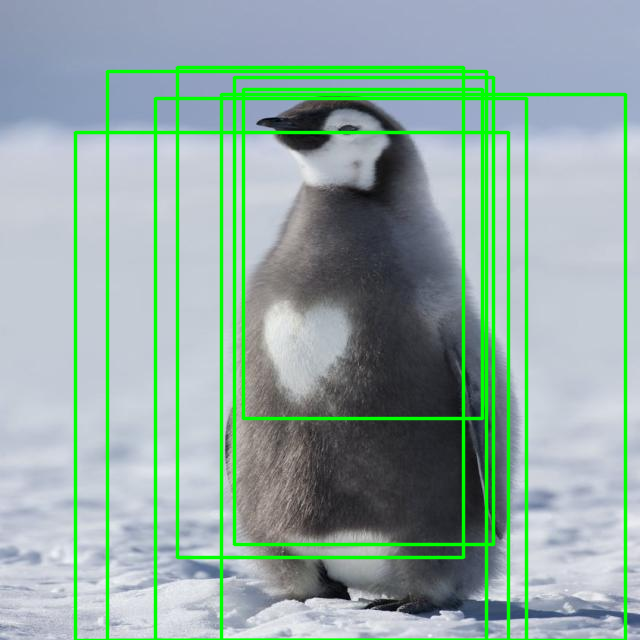

In [14]:
# Example usage
image_path = os.path.join(VAL_DIR, 'data/original/valid/image_id_000.jpg')

image = cv2.imread(image_path)

bounding_boxes = detection(image_path, model)

# Draw bounding boxes on the image
for (left, top, right, bottom) in bounding_boxes:
    start_point = (left, top)
    end_point = (right, bottom)
    color = (0, 255, 0)
    thickness = 2
    lineType = cv2.LINE_AA
    cv2.rectangle(image, start_point, end_point, color, thickness, lineType)

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()